In [102]:
import matplotlib
import math
from scipy.stats import probplot as qqplot 
matplotlib.rcParams['text.usetex'] = True  # Allows to use latex in labels
from scipy.stats import norm 
import numpy as np
import pandas
import matplotlib.pyplot as plt
from scipy.stats import f_oneway as ANOVA
from scipy.stats import f as F


1)

H_0: Regardless of the variations, 
the conversion rate to download the app will stay the same.

H_a: The new version will have a larger conversion rate.

Use $\alpha=0.05$ significance level (0.05 decision rule)

\begin{equation*}
P(\mbox{ reject } H_0 | H_0 \mbox{ is true })
= P\left(\frac{n_A}{N_A} - \frac{n_B}{N_B} \neq 0 | p_A - p_B=0 \right)
= P(Z \leq -z_{\alpha/2} | p_A=p_B) + P(Z \geq z_{\alpha/2} | p_A=p_B)
\end{equation*}

\begin{equation*}
P(\mbox{ reject } H_0 | H_0 \mbox{ is true })
= P\left(\frac{1,250}{12,500} - \frac{1,400}{12,500} \neq 0 | 0.1 - 0.112 \right)
= P(Z \leq -z_{\alpha/2} | p_A=p_B) + P(Z \geq z_{\alpha/2} | p_A=p_B)
\end{equation*}

In [103]:
y_bar_A = 1250 / 12500
sigma_A = math.sqrt(y_bar_A * (1 - y_bar_A) / 12500)

y_bar_B = 1400/ 12500
sigma_B = math.sqrt(y_bar_B * (1 - y_bar_B) / 12500)


z = (y_bar_A - y_bar_B) / math.sqrt(sigma_A**2 + sigma_B**2)
    

Since alpha is .05 our rejection region is 1.96

In [104]:
print("Z score is: " + str(z))
p_value = 2 * norm.cdf(z, loc=0, scale=1)

print("p-value is: " + str(p_value))

Z score is: -3.0823508478805492
p-value is: 0.0020537262167849065


So we see that our null hypothesis is seen to be false, 
and proving our alternate hypothesis

2)

In [105]:
nova_pizza = [12.6,12,11.8,11.9,13,12.5,14]
pomodoro_pizza = [10,10.2,10,12,14,13,12]
volturno = [10.1,13,13.4,12.9,8.9,10.7,13.6]

F_value, p_value = ANOVA(nova_pizza, pomodoro_pizza, volturno)

In [106]:
print('The F-statistic value is:',F_value)
print('The p-value is:',p_value)

The F-statistic value is: 0.7837545906243251
The p-value is: 0.4716638911457141


H_0: all the companies have the same mean response time.
H_a: different companies have different mean response times.

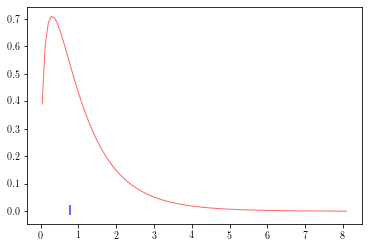

In [107]:
# plot of the F-distribution with df from previous problem in red
# value of the F-statistic from previous problem in blue
fig, ax = plt.subplots(1, 1)
dfn, dfd = 3, 20
x = np.linspace(F.ppf(0.01, dfn, dfd),
                    F.ppf(0.999, dfn, dfd), 100)

ax.plot(x, F.pdf(x, dfn, dfd),
                    'r-', lw=1, alpha=0.6, label='F pdf')

ax.plot([F_value,F_value], [-0.01,0.02],
                    'b-', lw=2, alpha=0.6)

In [108]:
# p-value calculated from the F-distribution
p_value = 1 - F.cdf(F_value, dfn, dfd)
p_value

0.516952251456472

In [109]:
# mean (expected value) and median of the F-distribution
mean = F.mean(dfn, dfd), F.median(dfn, dfd)
mean

(1.1111111111111112, 0.8162127084336458)

In [110]:
median = F.median(dfn, dfd)
median

0.8162127084336458

In [111]:
rows = ['Nova Pizza', 'Pomodoro Pizza', 'Volturno']
df = pandas.DataFrame([nova_pizza, pomodoro_pizza, volturno], index=rows)

In [112]:
df

,0,1,2,3,4,5,6
Nova Pizza,12.6,12.0,11.8,11.9,13.0,12.5,14.0
Pomodoro Pizza,10.0,10.2,10.0,12.0,14.0,13.0,12.0
Volturno,10.1,13.0,13.4,12.9,8.9,10.7,13.6


In [113]:
data = nova_pizza + pomodoro_pizza + volturno
groups = ['Nova Pizza']*len(nova_pizza) + ['Pomodoro Pizza'] * \
         len(pomodoro_pizza) + ['Volturno'] * len(volturno)

df = pandas.DataFrame(list(zip(groups,data)),columns=['resturant', 'response time'])
df                

,resturant,response time
0,Nova Pizza,12.6
1,Nova Pizza,12.0
2,Nova Pizza,11.8
3,Nova Pizza,11.9
4,Nova Pizza,13.0
5,Nova Pizza,12.5
6,Nova Pizza,14.0
7,Pomodoro Pizza,10.0
8,Pomodoro Pizza,10.2
9,Pomodoro Pizza,10.0


In [114]:
aov = df.anova(dv='response time', between='resturant', detailed=True)
# aov

AttributeError: 'DataFrame' object has no attribute 'anova'

We can see that some restaurants are faster than others.